In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA EXPLORATION


In [ ]:
! wget -O train.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/train.csv
! wget -O test.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/test.csv
! wget -O sample_submission.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/sample_submission.csv

--2024-02-14 14:45:19--  https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12350130 (12M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  11.78M  35.2MB/s    in 0.3s    

2024-02-14 14:45:20 (35.2 MB/s) - ‘train.csv’ saved [12350130/12350130]

--2024-02-14 14:45:20--  https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8086863 (7.7M) 

In [ ]:
train_data= pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")

In [ ]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
test_data.shape

(110023, 13)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
test_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
test_data.isna().any()  #return in bool values

id                 False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

Identifying unwanted col

In [ ]:
train_data=train_data.drop(['id','CustomerId','Surname'],axis=1)
test_data=test_data.drop(['id','CustomerId','Surname'],axis=1)

In [ ]:
train_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
train_data.duplicated().any()

True

In [ ]:
train_data.duplicated().sum()

123

In [ ]:
train_data= train_data.drop_duplicates()
train_data.duplicated().any()

False

In [ ]:
test_data= test_data.drop_duplicates()
test_data.duplicated().any()

False

In [ ]:
# seperating categorical data and numerical data

num_train_data= train_data.select_dtypes(include=np.number)
cat_train_data= train_data.select_dtypes(exclude=np.number)

# seperating categorical data and numerical data

num_test_data= test_data.select_dtypes(include=np.number)
cat_test_data= test_data.select_dtypes(exclude=np.number)



In [ ]:
#  correlation

corr= num_train_data.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008832,0.000969,0.006880,0.011360,-0.002851,0.014944,-0.001866,-0.027541
Age,-0.008832,1.000000,-0.010797,0.064426,-0.102274,-0.012282,0.003161,-0.005533,0.341009
Tenure,0.000969,-0.010797,1.000000,-0.009532,0.007387,0.005358,-0.005509,0.001082,-0.019557
Balance,0.006880,0.064426,-0.009532,1.000000,-0.360986,-0.018569,-0.014984,0.008566,0.129669
NumOfProducts,0.011360,-0.102274,0.007387,-0.360986,1.000000,0.005441,0.039741,-0.004322,-0.214598
HasCrCard,-0.002851,-0.012282,0.005358,-0.018569,0.005441,1.000000,-0.021023,0.004581,-0.022141
IsActiveMember,0.014944,0.003161,-0.005509,-0.014984,0.039741,-0.021023,1.000000,-0.008084,-0.210254
EstimatedSalary,-0.001866,-0.005533,0.001082,0.008566,-0.004322,0.004581,-0.008084,1.000000,0.018722
Exited,-0.027541,0.341009,-0.019557,0.129669,-0.214598,-0.022141,-0.210254,0.018722,1.000000


<Axes: >

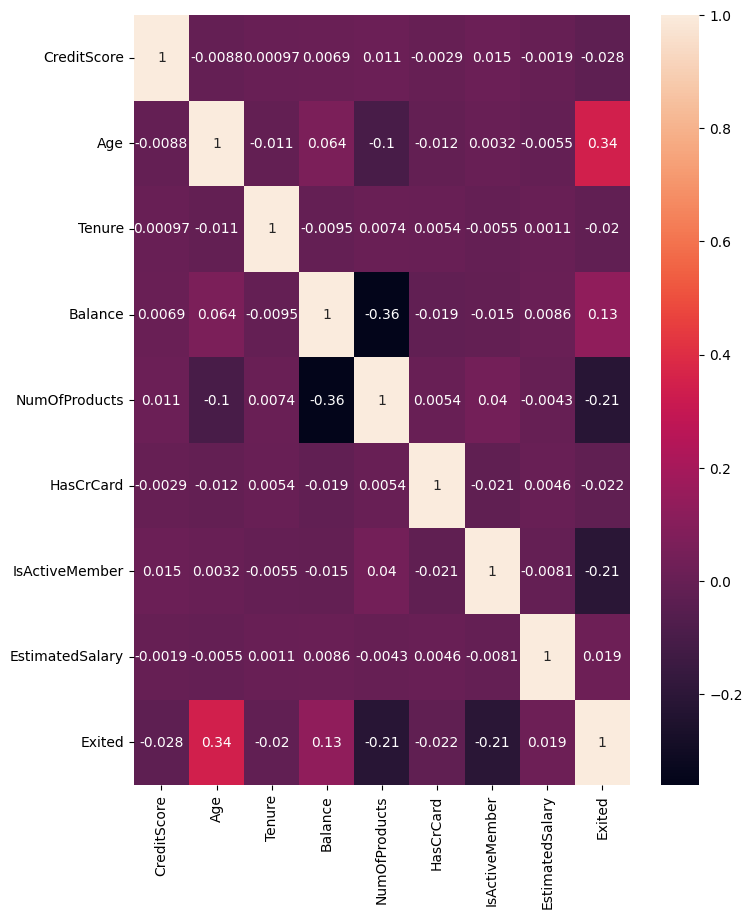

In [ ]:
import seaborn as sb
plt.figure(figsize=(8,10))
sb.heatmap(corr,annot=True)

DATA PREPROCESSING
Change categ to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in cat_train_data.columns:
  labelencoder.fit(train_data[col])
  train_data[col]= labelencoder.transform(train_data[col])




In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in cat_test_data.columns:
  labelencoder.fit(test_data[col])
  test_data[col]= labelencoder.transform(test_data[col])




Feature engineering

In [ ]:
# create a new col

train_data['balance_per_salary']= train_data['Balance']/train_data['EstimatedSalary']

train_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_per_salary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.000000
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.000000
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.000000
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,2.269582


In [ ]:
# create a new col

test_data['balance_per_salary']= test_data['Balance']/test_data['EstimatedSalary']

test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,balance_per_salary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,0.000000
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.000000
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.000000
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.000000
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.869703
...,...,...,...,...,...,...,...,...,...,...,...
110018,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0.783994
110019,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68,4.220613
110020,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38,0.000000
110021,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58,0.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# to scale all cols
minmaxscaler=MinMaxScaler()
# dont scale the target col
# ml_train=pd.Data minmaxscaler.fit_transform(train_data.drop(columns=['Exited']))

for col in train_data.columns:
  if col!='Exited':
    minmaxscaler.fit(train_data[[col]])
    train_data[col]= minmaxscaler.transform(train_data[[col]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# to scale all cols
minmaxscaler=MinMaxScaler()
# dont scale the target col
# ml_train=pd.Data minmaxscaler.fit_transform(train_data.drop(columns=['Exited']))

for col in test_data.columns:
  if col!='Exited':
    minmaxscaler.fit(test_data[[col]])
    test_data[col]= minmaxscaler.transform(test_data[[col]])

In [ ]:
from sklearn.model_selection import train_test_split
y=train_data['Exited']
x=train_data.drop(columns=['Exited'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=72)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg_ypred=logreg.predict(x_test)
logreg_ypred


array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_ypred=xgb.predict(x_test)
xgb_ypred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,logreg_ypred)

0.4606783919597989

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,xgb_ypred)

0.6406216274552126

In [ ]:
from sklearn.model_selection import GridSearchCV
paramdict={'n_estimators':[50,100],'max_depth':[2,5],'learning_rate':[0.1,0.01]}
gridsearch=GridSearchCV(estimator=xgb,param_grid=paramdict,cv=5)
gridsearch.fit(x_train,y_train)
xgb_gsv_ypred=gridsearch.predict(x_test)



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,xgb_ypred)

0.6406216274552126

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,xgb_gsv_ypred)

array([[36950,  1974],
       [ 4614,  5936]])

<function matplotlib.pyplot.show(close=None, block=None)>

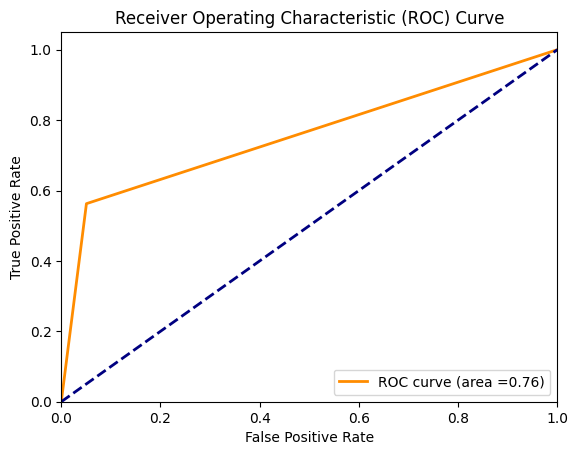

In [ ]:
# ROC Curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, xgb_gsv_ypred)

# Compute Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area =%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show

In [ ]:
ypred=gridsearch.predict(test_data)
ypred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
ypred.to_csv('submission.csv',index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'